# Python Workshop

Importing different libraries allows us to access and use the functions stored inside them. These six lines are the most commonly used data science packages and settings, so it's good practice to include at the top of every notebook you open.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Section 1: Variables, types, and basic math operations
---
So far, we've added the following *operations* to our toolbox:
- `+` , `-` , `*` , `/` : Add, subtract, multiply, divide
- `=` : Assign variables
- `<`, `>`, `<=`, `>=`, `==`: Compare values
---

Suppose we have the following data on Covid-19 cases:

<header><h4 align='center'>Covid-19 Cases</h4></header>
<table border="1" class="dataframe">
    <thead>
        <tr>
            <td><b>Date</b></td>
            <td><b>Country</b></td>
            <td><b>Cumulative Cases</b></td>
            <td><b>Cumulative Deaths</b></td>
        </tr>
    </thead>
    <tr>
        <td>3/14</td>
        <td>USA</td>
        <td>2943</td>
        <td>57</td>
    </tr>
    <tr>
        <td>3/14</td>
        <td>Italy</td>
        <td>21157</td>
        <td>1441</td>
    </tr>
    <tr>
        <td>3/15</td>
        <td>USA</td>
        <td>3754</td>
        <td>68</td>
    </tr>
    <tr>
        <td>3/15</td>
        <td>Italy</td>
        <td>24747</td>
        <td>1809</td>
    </tr>
</table>

**Task:** 
- Assign four variables to represent cumulative cases for the United States and Italy for 3/14 and 3/15.
- Use these four variables to create two new variables that represent the number of new cases on 3/15 for each country.
- Use the two profit variables to calculate the total number of new cases in Italy and the US.

In [2]:
# Number of cumulative COVID-19 cases in Italy and USA on 3/14 and 3/15

italy_314 = 21157
usa_314 = 2943
italy_315 = 24747
usa_315 = 3754

print(italy_314, usa_314, italy_315, usa_315)

21157 2943 24747 3754


In [3]:
# New cases

new_cases_italy = italy_315 - italy_314
new_cases_usa = usa_315 - usa_314

print(new_cases_italy, new_cases_usa)

3590 811


In [4]:
# Combined new cases

total_new_cases = new_cases_italy + new_cases_usa

total_new_cases

4401

**Task:**
  - What was the average number of new cases per hour in Italy and the US
  - Doctors are working hard to limit number of new cases per hour to 180. Did they achieve this? Format the answer as a boolean (`True` or `False`)

In [5]:
# Monthly profit figures

average_new_cases_per_hour = total_new_cases / 24

average_new_cases_per_hour

183.375

In [6]:
# Success?

success = (average_new_cases_per_hour < 180)

success

False

## Section 2: Lists, loops, and conditionals
---
We now have additional tools in our toolbox:
- Lists allow us to store multiple values in one variable
- Loops allow us to operate on lists by *iterating* through each value in the list
- Conditionals allow us to perform operations only if a condition is met
---
Let's look into the number of Covid-19 cases/deaths in Italy a little deeper

| Date    |   Cumulative Cases |   Cumulative Deaths |
|:--------|------------:|---------:|
| 3/1/20  |        1694 |       34 |
| 3/2/20  |        2036 |       52 |
| 3/3/20  |        2502 |       79 |
| 3/4/20  |        3089 |      107 |
| 3/5/20  |        3858 |      148 |
| 3/6/20  |        4636 |      197 |
| 3/7/20  |        5883 |      233 |
| 3/8/20  |        7375 |      366 |
| 3/9/20  |        9172 |      463 |
| 3/10/20 |       10149 |      631 |
| 3/11/20 |       12462 |      827 |
| 3/12/20 |       15133 |     1016 |

Then, the "Cumulative Cases" and "Cumulative Deaths" columns can be represented using two lists:

In [7]:
cumulative_cases = [1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15133]
cumulative_deaths = [34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016]

In [8]:
# create a new list with the number of new cases per day

new_cases = np.diff(cumulative_cases)
new_cases

array([ 342,  466,  587,  769,  778, 1247, 1492, 1797,  977, 2313, 2671])

**Task:**
- Find the average number of new cases per day, using `new_cases`
- Using a loop, print out the average number of new cases per hour for each day
- Only print out the average number of new cases per hour if it's larger than <strong>50</strong>

In [9]:
# Mean

average_new_cases = sum(new_cases) / len(new_cases)

print(average_new_cases)

1221.7272727272727


In [10]:
# Average number of new cases per hour per day

for i in new_cases:
    print(i/24)

14.25
19.416666666666668
24.458333333333332
32.041666666666664
32.416666666666664
51.958333333333336
62.166666666666664
74.875
40.708333333333336
96.375
111.29166666666667


In [11]:
# Average number of new cases per hour per day only if its larger than 50

for i in new_cases:
    per_hour = i/24
    if per_hour > 50:
        print(per_hour)

51.958333333333336
62.166666666666664
74.875
96.375
111.29166666666667


**Task:** 
- (Challenging!) Let's calculate the number of new deaths per day using `cumulative_deaths`.
- We did this with `np.diff` before, but let's implement what the function is doing!
- Use a loop to calculate the day-by-day change in number of deaths.
  - Hint: Since we have data for 12 days (`len(cumulative_deaths)`), there are 11 values that we will want to calculate.

In [12]:
# Number of new deaths per day

new_deaths = []

for i in range(len(cumulative_deaths) - 1): # equivalent of "for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
    change = cumulative_deaths[i+1] - cumulative_deaths[i]
    new_deaths.append(change)
    
new_deaths

[18, 27, 28, 41, 49, 36, 133, 97, 168, 196, 189]

## Section 3: Numpy
---
New tools:
- Numpy arrays: a list-like data structure much better suited for mathmatical operations
- Numpy functions: mathmatical functions that can be applied on numpy arrays and lists

**Task:**
- For the average number of new deaths per day (`new_deaths`), find the following using Numpy functions:
  - Mean ([`np.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html))
  - Standard deviation ([`np.std`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html))
  - 25, 50, 75th percentiles ([`np.percentile`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html))

In [13]:
# Mean

average_new_deaths = np.mean(new_deaths)

print(average_new_cases)

1221.7272727272727


In [14]:
# Standard deviation

new_deaths_std = np.std(new_deaths)

print(new_deaths_std)

66.74795319856892


In [15]:
# 25, 50, 75th percentiles

new_deaths_perc = np.percentile(new_deaths, [25, 50, 75])

print(new_deaths_perc)

[ 32.   49.  150.5]


Before we complete the next task, observe the following two cells to observe the difference between the two:

In [16]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [17]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

We see that for lists, the `+` operator *concatenates* them, while for numpy arrays, `+`  performs *element-wise* addition. 

**Task:**
- Using `cumulative_cases` and `cumulative_deaths`, find the death rate per day

In [18]:
# death rate per day

death_rate = np.array(cumulative_deaths)/np.array(cumulative_cases)

print(death_rate)

[0.02007084 0.02554028 0.03157474 0.03463904 0.03836185 0.04249353
 0.03960564 0.04962712 0.05047972 0.06217361 0.06636174 0.06713804]


## Section 4: Using Pandas to Manipulate Data
---
New tools (assume `df` is a DataFrame, `colname` is the name of a column):
- [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to read CSV files
- `df.head()` to view the first 5 lines
- `df['colname']` to view a column as a `Series`
- `df[['colname1', 'colname2']]` to view multiple columns as a `DataFrame` 
- `df.loc[_____, _____]` to view certain rows and columns based on index names
- `df.iloc[_____, _____]` to view certain rows and columns based on numerical indices
---

Switching gears, we'll move to a real-life dataset of Kiva loans.

**Task:**
- Read in the Kiva dataset; let's call it `loans`.
- View the first five lines to get a grasp of what the data looks like

In [19]:
# check if data file is unzipped, if not unzip it

import os  
path = 'data/kiva_loans.csv'
if not os.path.isfile(path):
    !unzip data.zip

In [20]:
# Read in dataset
loans = pd.read_csv('data/kiva_loans.csv')

In [21]:
# View first five lines
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Tranpotation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Tranpotation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


**Task:**

It's always good practice to do two things once we first load a dataset:
- Use `.shape` to find the dimensions of the data
- Use `.isnull().sum()` to find how many values are missing from each column
    - (Optional) If you'd like to know how/why this works, check out the documentation for [`df.isnull()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [`df.sum()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html), and try each separately on `loans`!

In [22]:
# Dimensions of data
print(loans.shape)

(671205, 20)


In [23]:
# Number of missing values from each column
loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

**Task:**

For these next two tasks, use only square brackets (not `.loc` or `.iloc`).
- Take a look at the `use` column by itself, as a `Series`
- Take a look at the `sector` and `use` columns together, as a `DataFrame`
    - Do you notice anything odd about the `sector` column?

In [24]:
# 'use' column
loans['use']

0                   To buy seasonal, fresh fruits to sell. 
1         to repair and maintain the auto rickshaw used ...
2         To repair their old cycle-van and buy another ...
3         to purchase an embroidery machine and a variet...
4                                  to purchase one buffalo.
5         purchase leather for my business using ksh 20000.
6         To purchase a dairy cow and start a milk produ...
7                to buy more hair and skin care products.  
8         to purchase leather, plastic soles and heels i...
9         to buy a stall, gram flour, ketchup, and coal ...
10                  to cover the cost of repairing rickshaw
11         to purchase biscuits, sweets and juices in bulk.
12                  to buy stock of rice, sugar and flour .
13           to purchase variety of winter clothes to sell.
14           to expand her existing  poultry farm business.
15                        to buy a three-wheeled rickshaw. 
16           to buy packs of salts, bisc

In [25]:
# 'sector' and 'use' columns
loans[['sector', 'use']]

,sector,use
0,Food,"To buy seasonal, fresh fruits to sell."
1,Tranpotation,to repair and maintain the auto rickshaw used ...
2,Tranpotation,To repair their old cycle-van and buy another ...
3,Arts,to purchase an embroidery machine and a variet...
4,Food,to purchase one buffalo.
5,Services,purchase leather for my business using ksh 20000.
6,Agriculture,To purchase a dairy cow and start a milk produ...
7,Services,to buy more hair and skin care products.
8,Manufacturing,"to purchase leather, plastic soles and heels i..."
9,Food,"to buy a stall, gram flour, ketchup, and coal ..."


**Task:**

For these next three tasks, use only square brackets (not `.loc` or `.iloc`).
- View the rows that have a `sector` value of `Tranpotation`. 
    - What format is this?
- Replace the `Tranpotation` values with `Transportation`.
    - Are you seeing a warning? Why might this happen?
- Use [`Series.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html)
- Check to see if we correctly replaced the `Tranpotation` values.

In [26]:
# View rows with the sector Tranpotation
loans[loans['sector'] == 'Tranpotation']

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
1,653053,575.0,575.0,Rickshaw,Tranpotation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Tranpotation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
10,653060,200.0,200.0,Rickshaw,Tranpotation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,2014-01-01 12:18:55+00:00,11.0,3,NaN,female,irregular,2014-01-01
15,653054,300.0,300.0,Rickshaw,Tranpotation,to buy a three-wheeled rickshaw.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-02 00:04:08+00:00,11.0,9,NaN,female,irregular,2014-01-01
27,653056,475.0,475.0,Rickshaw,Tranpotation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 07:20:09+00:00,2013-12-24 08:00:00+00:00,2014-01-01 20:26:48+00:00,12.0,17,NaN,female,irregular,2014-01-01
44,653085,450.0,450.0,Rickshaw,Tranpotation,to buy new tires for her son's rickshaw.,PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 11:55:38+00:00,2013-12-19 08:00:00+00:00,2014-01-14 18:25:00+00:00,14.0,15,#Elderly,female,monthly,2014-01-01
69,653410,1075.0,1075.0,Transportation,Tranpotation,to pay for general maintenance on his vehicle.,PE,Peru,Ica,PEN,139.0,2014-01-02 21:10:02+00:00,2013-12-06 08:00:00+00:00,2014-01-30 23:11:03+00:00,17.0,41,"#Parent, user_favorite",male,monthly,2014-01-02
92,653193,1500.0,1500.0,Motorcycle Transport,Tranpotation,To buy a motorcycle for his son's commute to s...,KH,Cambodia,Khsach Kandal district,USD,61.0,2014-01-02 07:17:22+00:00,2013-12-16 08:00:00+00:00,2014-01-23 16:28:01+00:00,26.0,53,"#Parent, user_favorite",male,monthly,2014-01-02
368,653162,500.0,500.0,Motorcycle Transport,Tranpotation,to buy a secondhand motorbike for commuting.,KH,Cambodia,Phnom Penh,USD,61.0,2014-01-02 06:06:03+00:00,2013-12-05 08:00:00+00:00,2014-01-03 00:52:24+00:00,22.0,5,NaN,male,monthly,2014-01-02
389,653445,725.0,725.0,Transportation,Tranpotation,to pay for vehicle maintenance and to buy uten...,PE,Peru,Camana,PEN,139.0,2014-01-03 00:29:29+00:00,2013-12-12 08:00:00+00:00,2014-01-30 03:22:39+00:00,14.0,22,"volunteer_pick, volunteer_like, #Hidden Gem, u...",male,monthly,2014-01-03


In [27]:
# Attempt to replace Tranpotation with Transportation using square brackets
loans[loans['sector'] == 'Tranpotation']['sector'] = 'Transportation'

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
#Better - use the Series.replace() method 
loans['sector'] = loans['sector'].replace({'Tranpotation' : 'Transportation'}) 
loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [29]:
# Verify correct(?) replacement
loans[loans['sector'] == 'Tranpotation']

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date


**Task:**
- Using `.loc[_____, ______]`, replace the `Tranpotation` values with `Transportation`.
- Verify using `loans[loans['sector'] == 'Tranpotation']`.

In [30]:
# Replace Tranpotation with Transportation using .loc
loans.loc[loans['sector'] == 'Tranpotation', 'sector'] = 'Transportation'

In [31]:
# Verify correct replacement
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


## Section 5: Working with Aggregate Data
---
More tools in our toolbox! Again, assume `df` is a DataFrame and `colname` is the name of a column.
- [`df.groupby(colname)`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html): Places each row of a DataFrame into a group based on certain column values
- `df.groupby(colname).function()` applies `function()` to each group. Possible functions include:
    - `count()`: number of non-NA rows in each group
    - `mean()`: mean of all values in each group
    - `std()`: standard deviation of all values in each group
    - `min()`: minimum of all values in each group
    - `max()`: maximum of all values in each group
    - `median()`: median of all values in each group
---

**Task:**
- Find the number of loans for each sector
- Find the average loan amount for each country

In [32]:
# Number of loans for each sector
loans_by_sector = loans.groupby('sector').count()[['id']]

loans_by_sector

,id
sector,
Agriculture,180302
Arts,12060
Clothing,32742
Construction,6268
Education,31013
Entertainment,830
Food,136657
Health,9223
Housing,33731


In [33]:
# Average loan amount for each country
average_loan_by_country = loans.groupby('country').mean()[['loan_amount']]

average_loan_by_country

,loan_amount
country,
Afghanistan,7000.000000
Albania,1378.748707
Armenia,1496.396710
Azerbaijan,1485.192802
Belize,912.200000
Benin,1044.164990
Bhutan,10000.000000
Bolivia,2253.378378
Brazil,2331.690141


## Section 6: Graphing
---
Basic graphing tools:
- [`plt.plot(x, y)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html): Line graph
- [`plt.scatter(x, y)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html): Scatter plot
- [`plt.bar(x, height)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html): Bar chart
- [`plt.hist(x)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html): Histogram
- [`plt.figure(figsize=(__, __))`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html): Set figure size
- [`plt.xlabel(_____)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html), [`plt.ylabel(_____)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html): Set x-axis and y-axis labels
- [`plt.xlim(_____)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html), [`plt.ylim(_____)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html): Set x-axis and y-axis limits
- [`plt.title(_____)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html): Set title
- [`plt.legend()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html): Show legend (assuming you have assigned labels; e.g. `plt.scatter(x, y, label='United States')`)
- Note that you can control almost any small detail on the graph! Color, line width/scatterpoint size, rotating axis tick-mark labels, etc. Chances are, someone else has had that question too! Use Google liberally.
---

**Task:**
- Create a scatterplot of `funded_amount` versus `loan_amount`.
- Create a histogram of the `term_in_months` to view the distribution of loan terms.
- Using `loans_by_sector` (the grouped DataFrame created in the last section), create a bar plot of the number of loans in each sector. 
    - Tip: You can use `df.index` to access the index names.
    - Try looking [here](https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib/23009503?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) for tips on how to rotate tick labels. This was the third Google search result; the first two returned results for more specific scenarios, and the third was exactly what we needed!
    - Do we need to include an x-axis label for this chart? Why or why not?
- Create a histogram of `loan_amount` to view the distribution of loan amounts.
    - Interpret the graph; why did the plotting function set these x-limits?
    - How can we work around this?

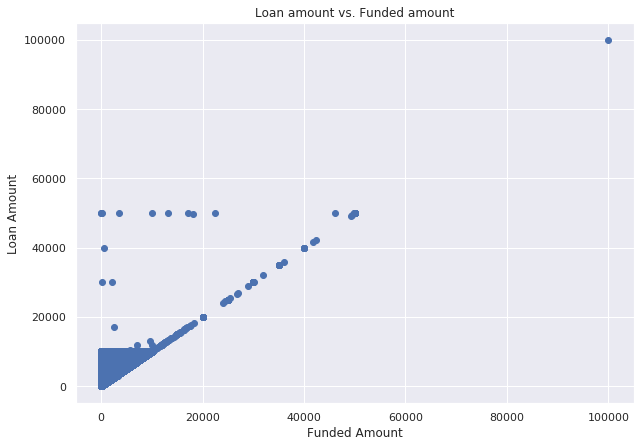

In [34]:
# Scatterplot, funded_amount vs. loan_amount
plt.figure(figsize=(10, 7))
plt.scatter(loans['funded_amount'], loans['loan_amount'])
plt.xlabel('Funded Amount')
plt.ylabel('Loan Amount')
plt.title('Loan amount vs. Funded amount');

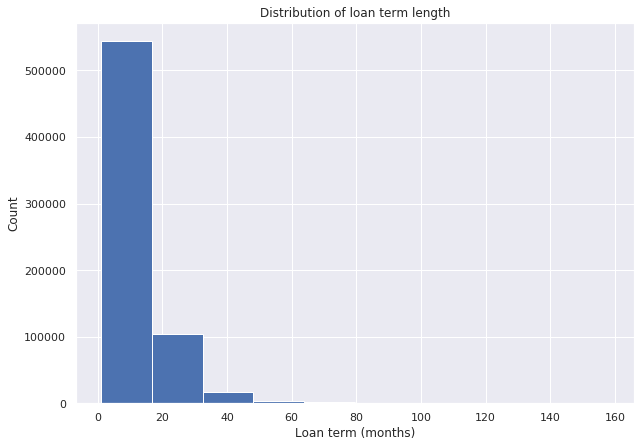

In [35]:
# Histogram, distribution of loan terms
plt.figure(figsize=(10, 7))
plt.hist(loans['term_in_months'])
plt.xlabel('Loan term (months)')
plt.ylabel('Count')
plt.title('Distribution of loan term length');

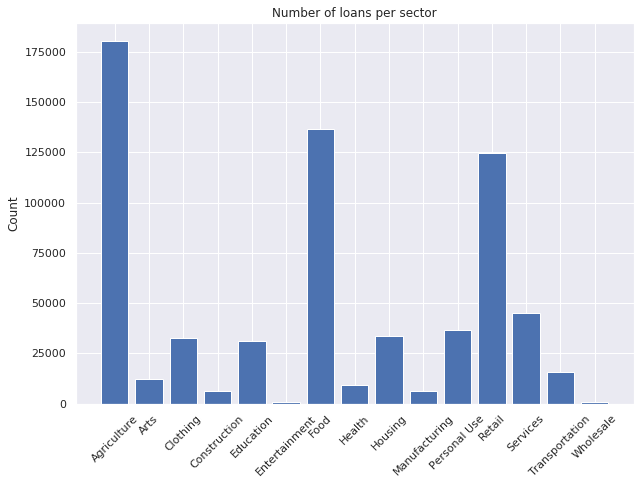

In [36]:
# Bar plot, number of loans in each sector
plt.figure(figsize=(10, 7))
plt.bar(loans_by_sector.index, loans_by_sector['id'])
# plt.xlabel('Sector') (Redundant; not necessary to include since it can be inferred from the labels)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Number of loans per sector');

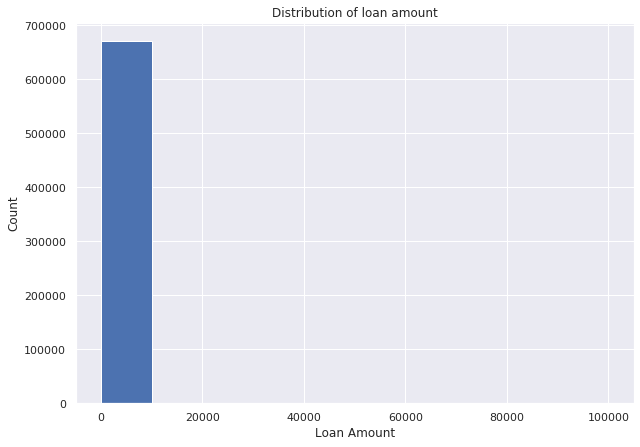

In [37]:
# Histogram, distribution of loan amount
plt.figure(figsize=(10, 7))
plt.hist(loans['loan_amount'])
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of loan amount');

Why do we get the above result? We can check the numerical distribution of a column using [`df[colname].describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html).

In [38]:
# Taking a look at the data:
loans['loan_amount'].describe()

count    671205.000000
mean        842.397107
std        1198.660073
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64

Note that the max loan is 100000, while the 75th percentile is 1000. This is why Matplotlib has decided to extend out our x-limits so widely, to fit in that max data point! In order to avoid this, we should subset the loan amounts in which most of our data lies; 5000 seems like a reasonable estimate.

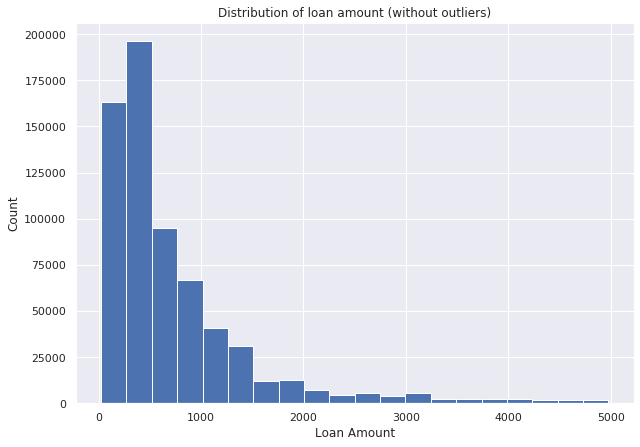

In [39]:
# Histogram, distribution of loan amount (without outliers):
plt.figure(figsize=(10, 7))
plt.hist(loans.loc[loans['loan_amount'] < 5000, 'loan_amount'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of loan amount (without outliers)');

## Merge/Join Example

_Merge_ and _Join_ are two separate pandas functions but perform similar actions. For the difference between the two: https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas

The main idea is to combine two dataframes and only keep the rows which have the same certain column values across both dataframes. 

Walk through the example by running the cells below. 


We make a dataframe of gdp of 5 countries and a dataframe of the unemployment rate of 3 countries.

In [40]:
gdp = pd.DataFrame(columns = ['Countries', 'Price (billions of $)' ])
gdp['Countries'] = pd.Series(['United States', 'China', 'India', 'Mexico', 'Austria'])
gdp['Price (billions of $)'] = pd.Series([20412.87, 14092.51, 2848.23, 1212.83, 477.67])
gdp

,Countries,Price (billions of $)
0,United States,20412.87
1,China,14092.51
2,India,2848.23
3,Mexico,1212.83
4,Austria,477.67


In [41]:
unemployment = pd.DataFrame(columns = ['Country Name', 'Unemployment Rate' ])
unemployment['Country Name'] = pd.Series(['India', 'United States', 'Austria'])
unemployment['Unemployment Rate'] = pd.Series([3.7, 5.6, 7.0])
unemployment

,Country Name,Unemployment Rate
0,India,3.7
1,United States,5.6
2,Austria,7.0


Now we want to find the countries for which we have information of both gdp and unemployment rate. 

So we combine, or _merge_, the gdp and unemployment dataframes based on the names of the countries. Since we are doing gdp _Right Merge/Join_ with unemployment, we keep the rows of the unemployment dataframe where the __Country Name__ column in unemployment = __Countries__ column of gdp.

Notice how we had the countries 'India', 'United States', and 'Austria' in our unemployment dataframe and our gdp dataframe.

In [42]:
right_merge_df = pd.merge(gdp, unemployment, how='right', left_on = 'Countries', right_on ='Country Name')
right_merge_df

,Countries,Price (billions of $),Country Name,Unemployment Rate
0,United States,20412.87,United States,5.6
1,India,2848.23,India,3.7
2,Austria,477.67,Austria,7.0


We then drop the unnecessary __Country Name__ column.

In [43]:
right_merge_df.drop('Country Name', 1)

,Countries,Price (billions of $),Unemployment Rate
0,United States,20412.87,5.6
1,India,2848.23,3.7
2,Austria,477.67,7.0
